In [1]:
using quantumoptics
using ODE
using PyPlot

In [11]:
function f(t::Float64, x::Vector{Complex128}, dx::Vector{Complex128})
    dx[1] = x[2]
    dx[2] = -x[1]
    nothing
end

function f_(t::Float64, x::Vector{Complex128})
    return [x[2], -x[1]]
end;

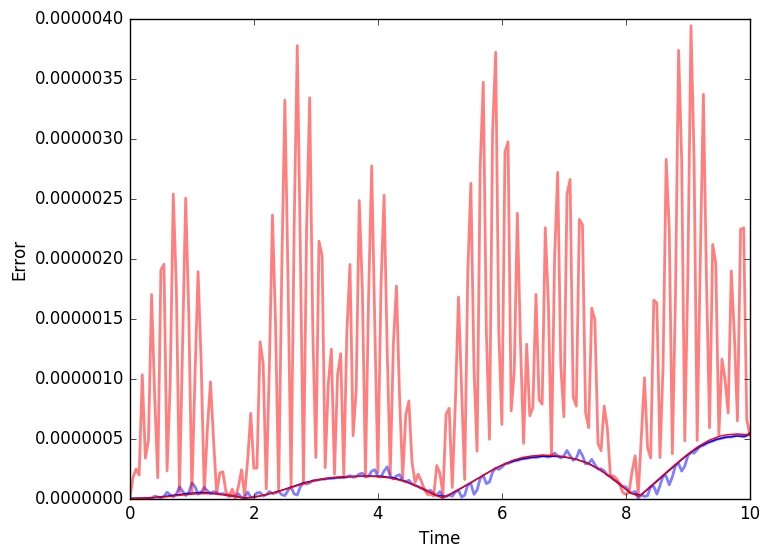

In [29]:
T = [0.:0.05:10;]
x0 = Complex128[1., 0.]
reltol = 1e-6
abstol = 1e-8

tout1, xt1 = quantumoptics.ode_dopri.ode(f, [T[1], T[end]], x0; abstol=abstol, reltol=reltol/2,
                                        display_intermediatesteps=true)
tout1_, xt1_ = quantumoptics.ode_dopri.ode(f, T, x0; abstol=abstol, reltol=reltol/2)

tout2, xt2 = ode45(f_, x0, [T[1], T[end]]; abstol=abstol, reltol=reltol)
tout2_, xt2_ = ode45(f_, x0, T; abstol=abstol, reltol=reltol, points=:specified)

x1 = Complex128[x[1] for x=xt1]
x1_ = Complex128[x[1] for x=xt1_]
x2 = Complex128[x[1] for x=xt2]
x2_ = Complex128[x[1] for x=xt2_]


plot(tout1, abs(cos(tout1) - x1), "b")
plot(tout1_, abs(cos(tout1_) - x1_), "-b", alpha=0.5, lw=2.)
plot(tout2, abs(cos(tout2) - x2), "r")
plot(tout2_, abs(cos(tout2_) - x2_), "-r", alpha=0.5, lw=2.)
xlabel("Time")
ylabel("Error");

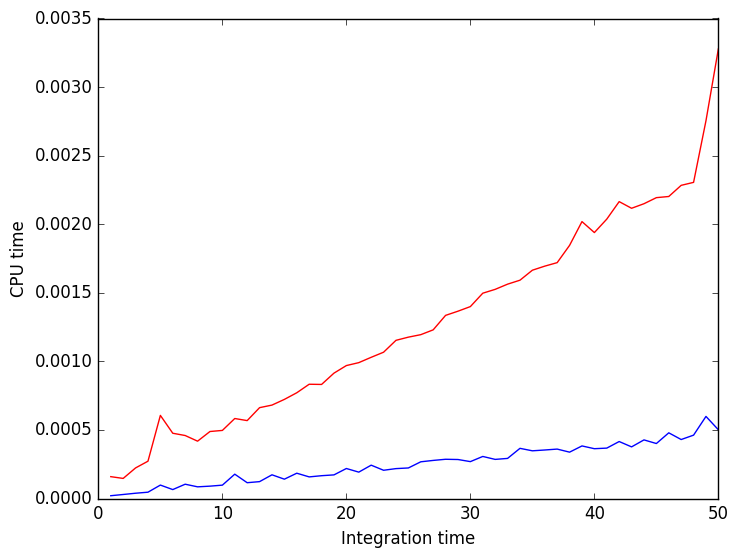

In [28]:
Nrepeat = 200
cputimes1 = Float64[]
cputimes2 = Float64[]

Tend = [1.:50;]
reltol = 1e-6
abstol = 1e-8

for tend = Tend
    T = [0., tend]
    quantumoptics.ode_dopri.ode(f, T, x0; abstol=abstol, reltol=reltol/2)
    ode45(f_, x0, T; abstol=abstol, reltol=reltol, points=:specified)
    
    cputime1 = 0.
    cputime2 = 0.

    for i=1:Nrepeat
        t0 = time()
        quantumoptics.ode_dopri.ode(f, T, x0; abstol=abstol, reltol=reltol/2)
        t1 = time()
        ode45(f_, x0, T; abstol=abstol, reltol=reltol, points=:specified)
        t2 = time()
        cputime1 += t1-t0
        cputime2 += t2-t1
    end
    
    push!(cputimes1, cputime1/Nrepeat)
    push!(cputimes2, cputime2/Nrepeat)
end

plot(Tend, cputimes1, "b")
plot(Tend, cputimes2, "r")
xlabel("Integration time")
ylabel("CPU time");